<a href="https://colab.research.google.com/github/swathysathesh/hotel-booking/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Cancellations Prediction**

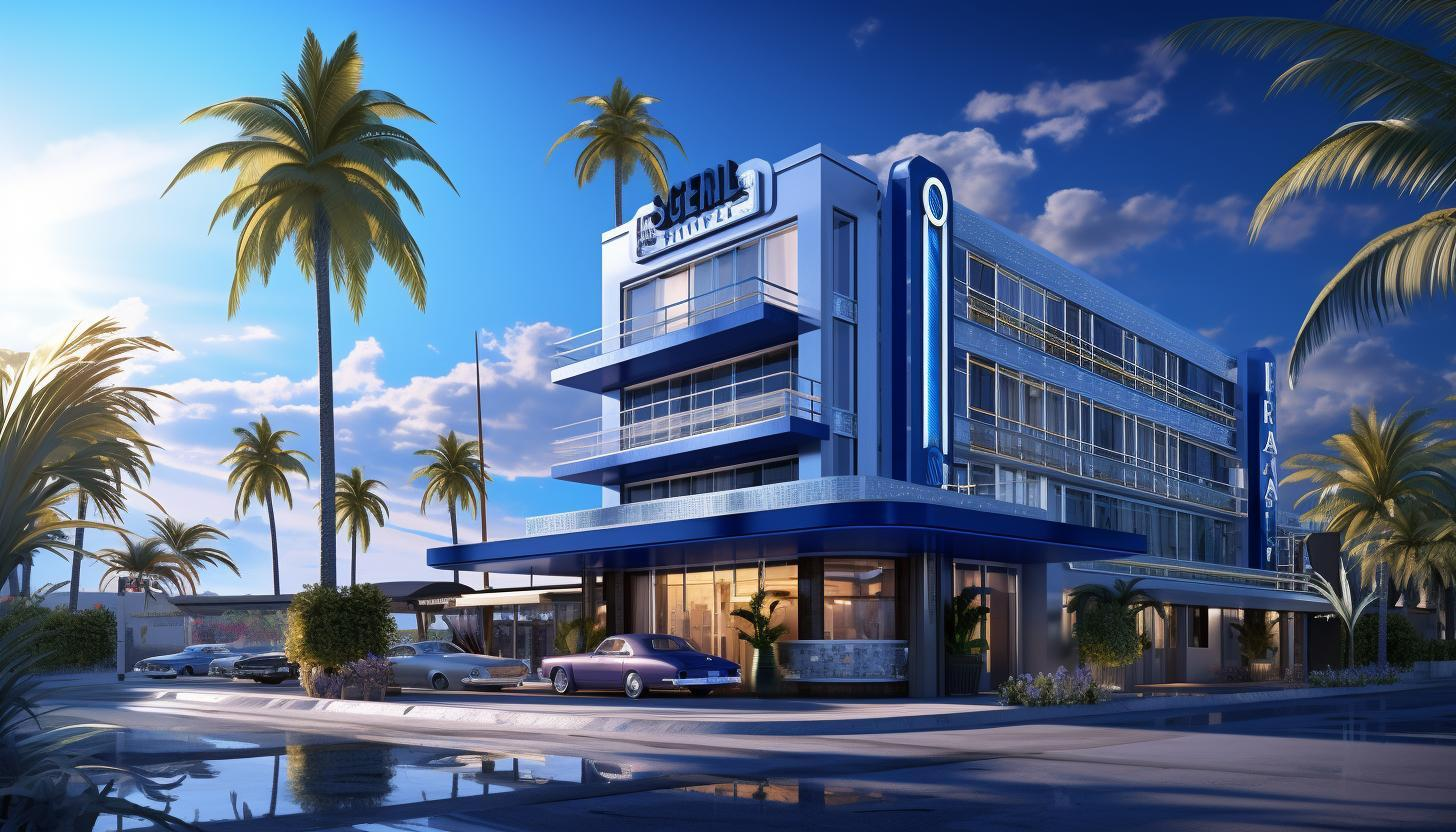




**Dataset source**:Kaggle

**Dataset link** :https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# **Problem statement**

In order to solve this problem, Here use a real life hotel booking dataset to create a customer segmentation analysis in order to gain insights about the customers (and hopefully reasons why they cancel their reservation). Here i am build a classification model (including the newly created customer clusters) to predict whether or not a booking will be canceled with the highest accuracy possible.
This model will allow hotels to predict if a new booking will be canceled or not, manage their business accordingly, and increase their revenue.

# **About The Dataset**

The dataset contains 119390 rows and 32 coloumns.Our goal is to build a model able to classify a booking as canceled or not canceled.

**FEATURES:**

**Hotel :** (Resort Hotel or City Hotel)

**lead_time :** Number of days that elapsed between the entering date of the booking into the Property Management System and the arrival date. Calculated by subtracting the entering date from the arrival date.

**arrival_date_year :** Year of arrival date

**arrival_date_month :** Month of arrival date

**arrival_date_week_number :** Week number of year for arrival date

**arrival_date_day_of_month :** Day of arrival date

**stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults :** Number of adults

**children :** Number of children

**babies :** Number of babies

**meal :** Type of meal booked. Categories are presented in standard hospitality meal packages **BB** - (Bed and Breakfast)
**HB**- (Half Board)
**FB**- (Full Board)
**SC**- (Self Catering)

**country :** Country of origin.`

**market_segment :** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest :** Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type :** Code for the type of room assigned to the booking.

**booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type :** Indication on if the customer made a deposit to guarantee the booking.

**agent :** ID of the travel agency that made the booking

**company :** ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type :** Type of booking, assuming one of four categories

**adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces :** Number of car parking spaces required by the customer

**total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status :** Reservation last status, assuming one of three categories

**Canceled –** booking was canceled by the customer
**Check-Out –** customer has checked in but already departed
**No-Show –** customer did not check-in and did inform the hotel of the reason why

**reservation_status_date -** Date at which the last status was set

**TARGET**

**is_canceled**: Value indicating if the booking was canceled (1) or not (0)

#Importing sufficient python libraries and importing the dataset




Importing some packages pandas, NumPy, matplotlib, and seaborn  for numerical computations,data preprocessing and data visualization.For doing operations, we have to read data by including a path into read_csv.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/hotel_bookings.csv (1).zip')
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#Dataset Overview

If we want to see the first five rows of our data table we have to call the head() function.

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


If we want to see the last five rows of our data table we have to call the tail() function.



In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset shape

To observe the total number of rows and columns in the table, we simply have to call shape.



In [ ]:
df.shape

(119390, 32)

###Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Number of Entries:** The dataset consists of 119,390 entries.

**Columns:** The dataset contains 32 columns, which represent various attributes related to hotel bookings.

**Data Types:**

* 12 coumns are of the object data type

* 16 columns are of the int64 data type, representing integer values.

* 4 columns are of the float64 data type, which typically
 denotes decimal values.




we are going to check the total column list by calling columns

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

displaying  description of the integer columns of a dataframe we have to call describe() function

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Based on the descriptions,the following features seem to contain noisy data:

**adr**: The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, ADR has a minimum value of -6.38. A negative rate doesn't make sense, indicating potential errors or special cases.

**adults,children,babies**: The minimum value is 0, which implies bookings without any adults. This could be a data entry error.

**children and babies**: Both have a maximum value of 10. This could be a potential outlier or data entry error.



displaying description about the object columns in a table

In [ ]:
df.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


**1.** There are 2 types of hotel,cityhotel was guest booked most.

**2.** There are different types of guests and most guests come from
    portugal.

**3.** Guests can choose different foods from the menu,most of them are choosed BB

**4.** Guests can book hotel directly or through different
    channels that are available,most of them are booking through TA/TO.


**5.** Guests can choose rooms of their liking while booking most of them choose room type A.



### Dataset type

To observe the data types, we simply have to call dtypes

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

###To check the missing values

For checking the null value available in our dataset we have to use the isna() function that means is the null value available And a sum function to do a summation of all the missing values in the dataset.

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Missing Values:**

 The column children has 4 missing values. The column country has 488 missing values. The column agent has 16,340 missing values. The column company has a significant number of missing values


##Check unique value for each variables

In [ ]:
for i in df.columns:
  print(i,":",df[i].unique())

hotel : ['Resort Hotel' 'City Hotel']
is_canceled : [0 1]
lead_time : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 2

# Data Preprocessing

###Droping irrelevent Features




**agent**:This feature has several unique categories, and some agents may only appear a few times in the dataset, which could cause overfitting.

**company**:This feature has a high percentage of missing values and may not be very informative for predicting cancellations, so it may be better to drop it entirely.

 **reservation_status_date:**reservation_status_date is a date feature that indicates the latest date at which the reservation_status was updated.
 the data type is object.


In [ ]:
df.drop(['reservation_status_date','company','agent'],axis=1,inplace=True)

##Handle Missing Values

In [ ]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [ ]:
df['children'].fillna(df['children'].mean(),inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)

##Changing the data type

* The children feature should be of type integer

In [ ]:
# Changing children  data type float to integer type:
df['children'] = df['children'].astype(int)



##Dropping duplicate values

In [ ]:
df.duplicated().sum()

32286

Dataset holds the duplicate entries.so we drop duplicates and reset the index

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87099,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
87100,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
87101,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
87102,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


##Check for logical errors


We have three columns (children, adults, babies) that can't be zero all the them at the same row. But we can see that there are 166 rows where all of them are 0

In [ ]:
filter=(df.children==0)&(df.adults==0)&(df.babies==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out


dropping logical errors & reset index to our new dataset

In [ ]:
indexguest=df[(df['children']==0)&(df['adults']==0)&(df['babies']==0)].index
df.drop(indexguest,inplace=True)
df.reset_index(drop=True, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86933,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
86934,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
86935,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
86936,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [ ]:
df.shape

(86938, 29)

# **Data visualization**

###1.What is the percentage of hotel booking cancellation

Text(0.5, 1.0, 'Hotel booking percentage')

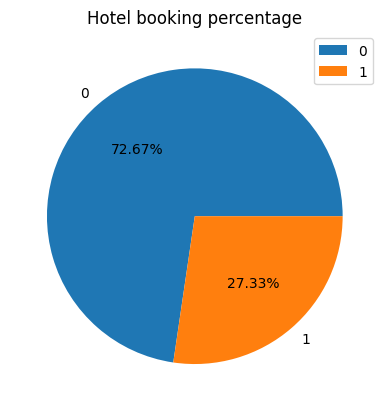

In [ ]:
plt.pie(df['is_canceled'].value_counts(),autopct='%1.2f%%',labels=[0,1])
plt.legend()
plt.title('Hotel booking percentage')

Here we can see that around 72.67% bookings are not canceled by guests but around 27.33% bookings are canceled by guests.

###2.which type of hotel is most preffered by the guests

Text(0.5, 1.0, 'Most preffered Hotel')

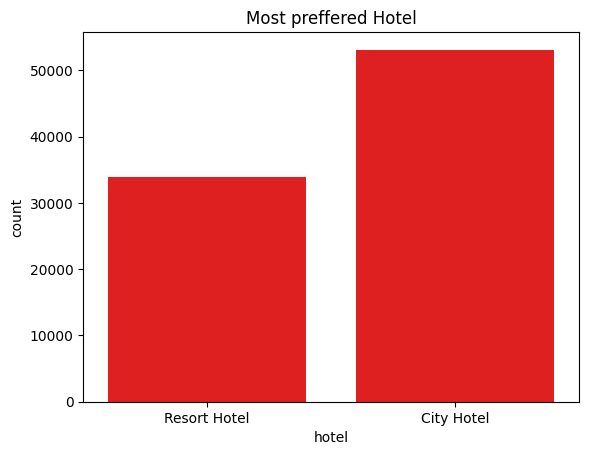

In [ ]:
sns.countplot(x='hotel',data=df,color='r')
plt.title('Most preffered Hotel')

I found out that guests prefer  City Hotel.This insight is useful for the stakeholder to check which hotel is performing best and they can invest more capitals in that.

###3.Which type of meal is most preffered by guests

<ipython-input-23-1cdf17810f39>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='meal',data=df,palette='bright')


Text(0.5, 1.0, 'Most preffered meal type')

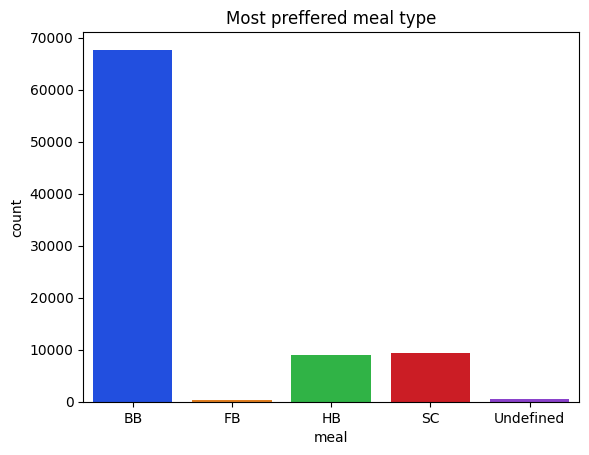

In [ ]:
sns.countplot(x='meal',data=df,palette='bright')
plt.title('Most preffered meal type')



After visualizing the above chart we can see that BB - (Bed and Breakfast) is the most preffered meal type by guests.so they can arrange raw material for this meal in advance and deliver the meal without any delay.

###5.Which year has the most bookings

Text(0.5, 1.0, 'Number of booking across a year')

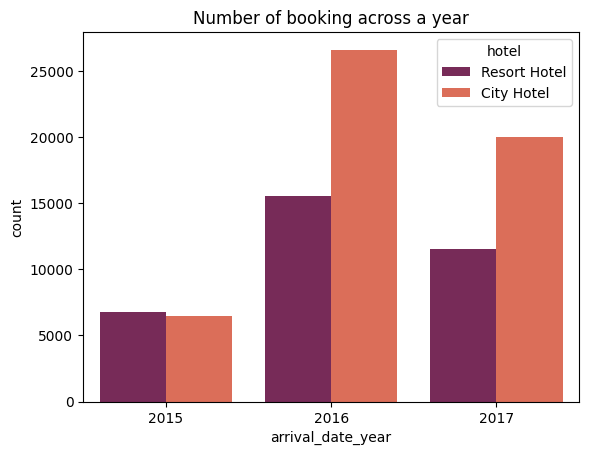

In [ ]:
sns.countplot(x='arrival_date_year',data=df,hue='hotel',palette='rocket')
plt.title('Number of booking across a year')

From above insight I found out that hotel was booked most times in year 2016.Above insight shows that number of booking was decreased after year 2016.  One way to do this is ask for feedbacks from guests and have a meeting with old employees who else were serving in the year 2016 to increase booking.

###6.Which month has the most bookings in each hotel type

Text(0.5, 1.0, 'Number of booking across a month')

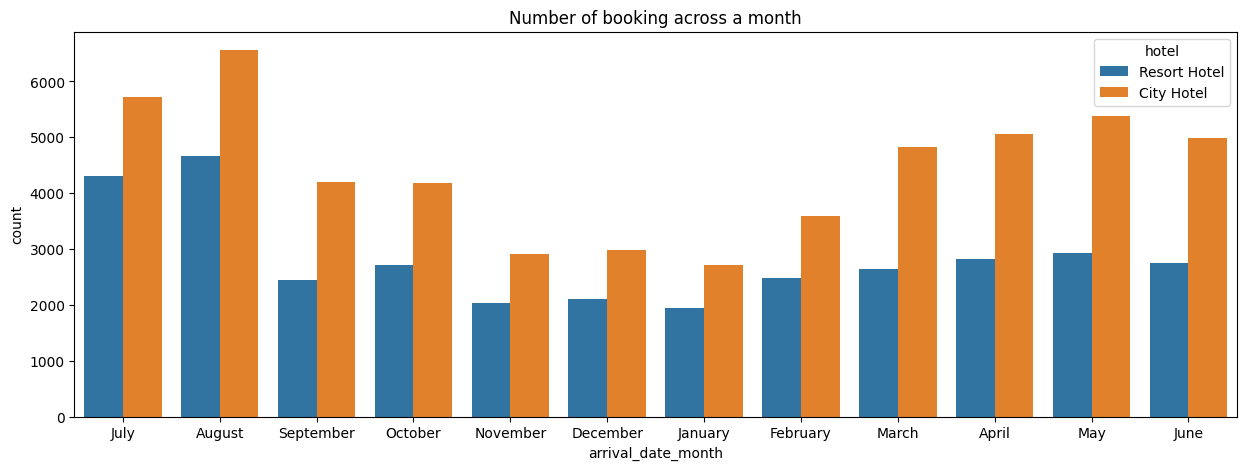

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='arrival_date_month',data=df,hue='hotel')
plt.title('Number of booking across a month')

Above insight shows that August and July ware 2 most busy months in compare to others.so hotel can use this insight to arrange everything in advance and welcome their guest in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

###7.which distribution channel is most used in booking

Text(0.5, 1.0, 'Most Used Booking Distribution Channels by Guests')

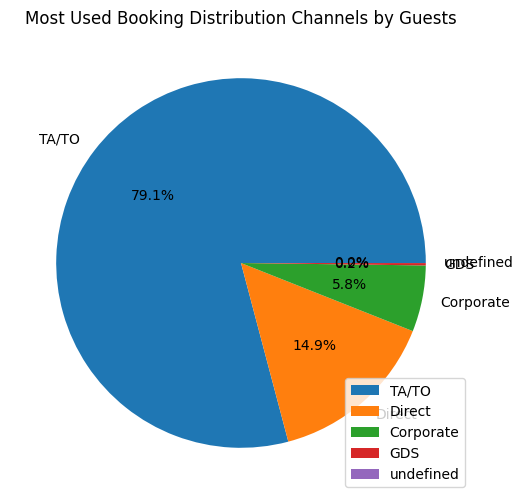

In [ ]:
plt.figure(figsize=(15,6))
plt.pie(df['distribution_channel'].value_counts(),autopct='%1.1f%%',labels=['TA/TO','Direct','Corporate','GDS','undefined'])
plt.legend()
plt.title('Most Used Booking Distribution Channels by Guests')

From the above insight it is clear that TA/TO (travel agents/Tour operators) is most used distribution channel by guests.Hotels can run promotional offers to motivate other channels to contribute more in bookings.

###8.Which type of room  most preffered by  guestes

<ipython-input-27-c6727482059c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['reserved_room_type'],order=df['reserved_room_type'].value_counts().index,palette='cool')


Text(0.5, 1.0, 'Preffered room type by guests')

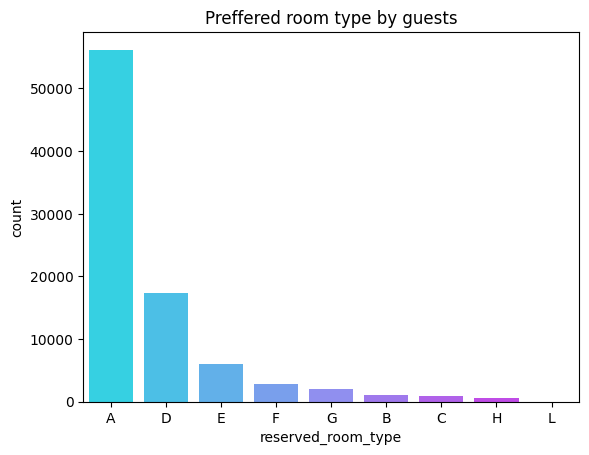

In [ ]:
sns.countplot(x=df['reserved_room_type'],order=df['reserved_room_type'].value_counts().index,palette='cool')
plt.title('Preffered room type by guests')


By observing the above chart we can understand that the room type A most preffered by the guests while booking the hotel.As it is clear that room type A is most used hotel should increase the number of A type room to maximize the revenue.


###9.Which room type is most assigned

<ipython-input-28-a779ecbdd577>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index,palette='hot')


Text(0.5, 1.0, 'assigned room type by guests')

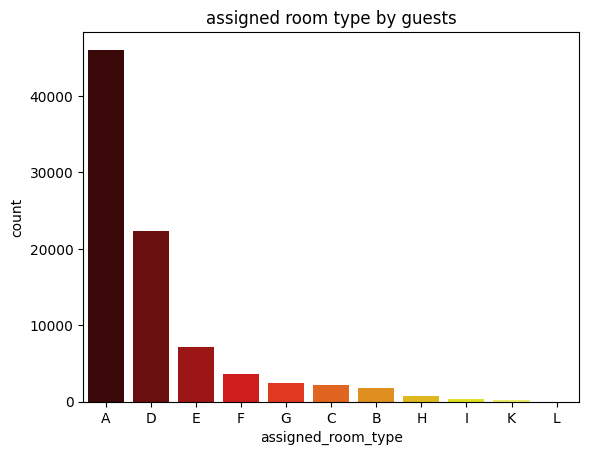

In [ ]:
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index,palette='hot')
plt.title('assigned room type by guests')


In the above chart we saw that around 55,000 guests preffered room type A but 45,000 people were assigned A type room. This could be a reason to cancel the bookings. Hotel could increase A type room to decrease cancellation.

###10.Percentage of repeated guests

Text(0.5, 1.0, 'Repeated guests')

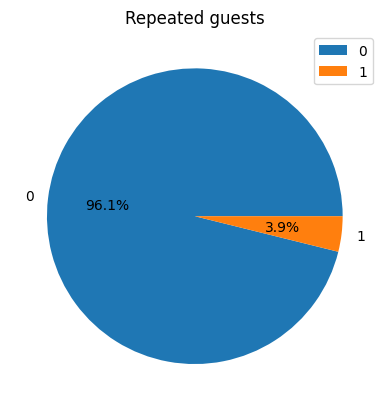

In [ ]:
plt.pie(df['is_repeated_guest'].value_counts(),labels=[0,1],autopct='%1.1f%%')
plt.legend()
plt.title('Repeated guests')

From the above insight we can see that 3.1% guests are repeated guests.We can see that number of repeated guests is very low and it shows negative growth of the hotel. Hotel can offer loyality discount to their guests to increase repeated guests and also ask customers feedback to improve bookings.

###11.Which customer type has the most booking

Text(0.5, 1.0, 'customer type booking count')

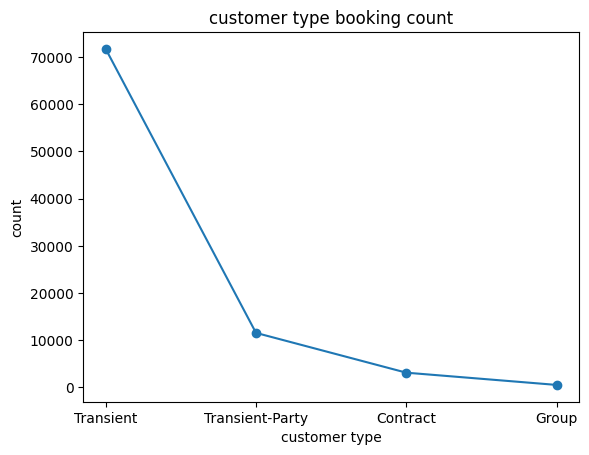

In [ ]:
plt.plot(df['customer_type'].value_counts(),marker='o')
plt.xlabel('customer type')
plt.ylabel('count')
plt.title('customer type booking count')


We can see that Transient customer type has most number of bookings.Hotel can run promotional offers to increase the number of bookings over other categories.

###12.Which Market Segment has the most booking

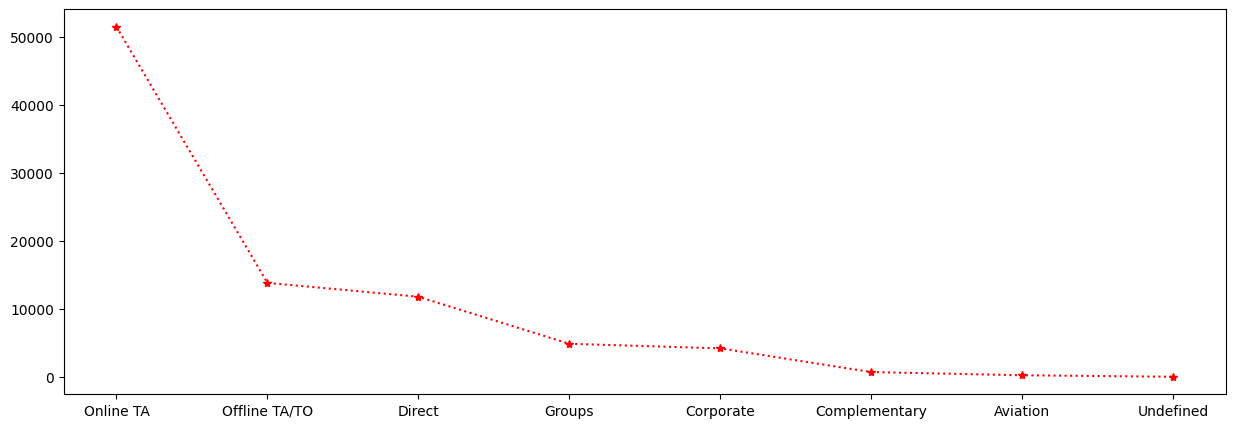

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['market_segment'].value_counts(),'*:r')

Above insight shows that Online TA (Travel Agent) has the most bookings.

###13. Most used deposite type

<ipython-input-32-5485b4ecccb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit_type',data=df,palette='colorblind')


<Axes: xlabel='deposit_type', ylabel='count'>

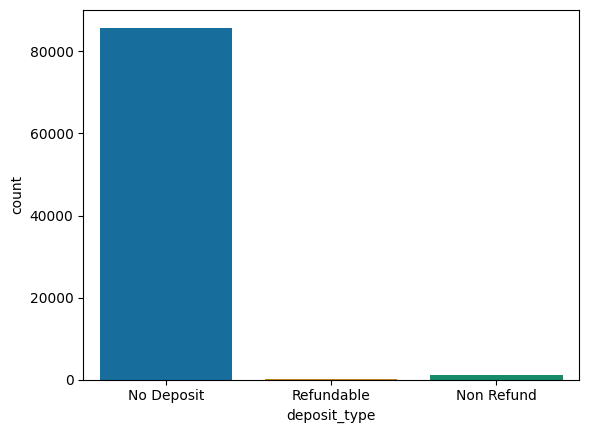

In [ ]:
sns.countplot(x='deposit_type',data=df,palette='colorblind')

###14.Reservation status

<Axes: xlabel='reservation_status', ylabel='count'>

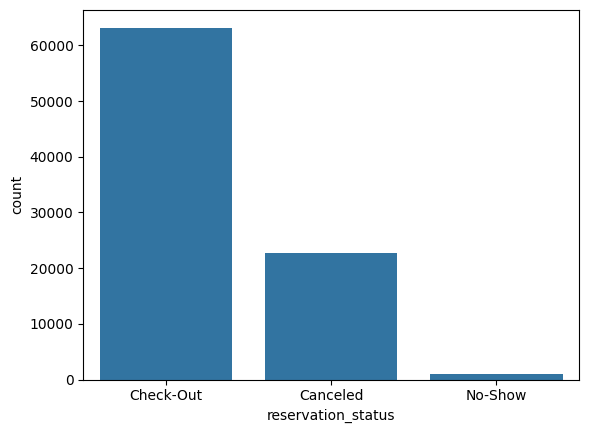

In [ ]:
sns.countplot(x='reservation_status',data=df)

### 15.Which hotel make most revenue

Text(0.5, 1.0, 'percentage of daily revenue by each hotel')

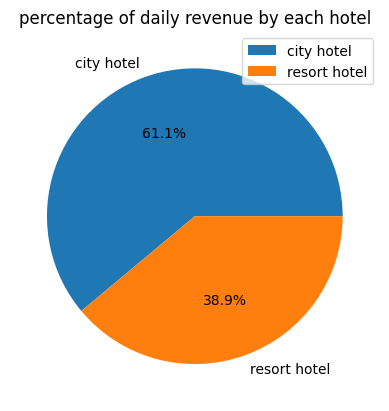

In [ ]:
plt.pie(df.groupby('hotel')['adr'].count(),autopct='%1.1f%%',labels=['city hotel','resort hotel'])
plt.legend()
plt.title('percentage of daily revenue by each hotel')

From the above insight it is clear that City hotel has more share in revenue over Resort hotel.Stakehoders could improve the service of resort hotel so that people stay more in resort hotel and increase the revenue.

###16.What is the adr across different months?

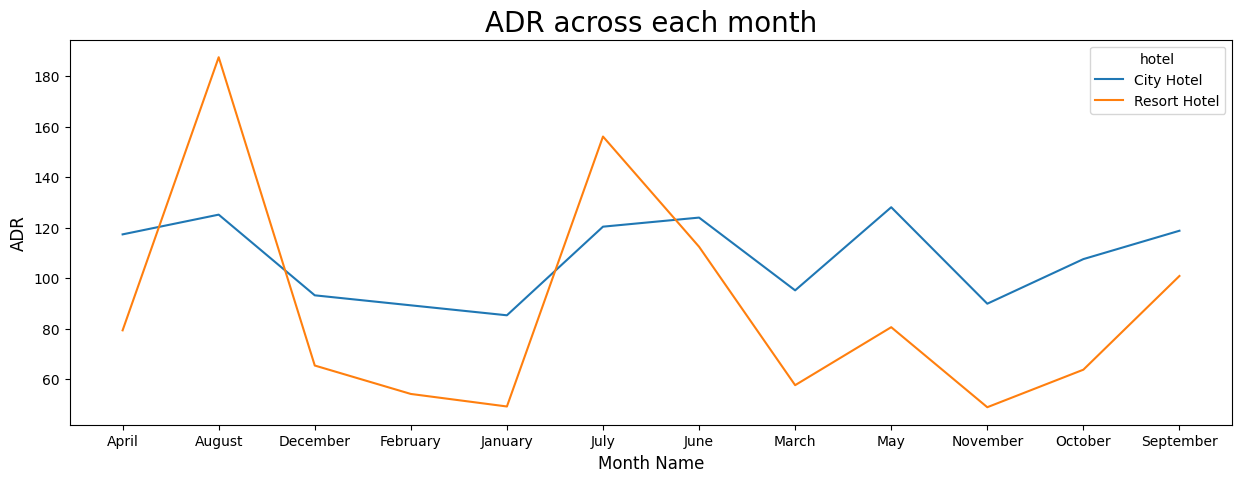

In [ ]:
bookings_months=df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=bookings_months['arrival_date_month'],y=bookings_months['adr'],hue=bookings_months['hotel'])
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)
plt.show()

 It is clear that City Hotel generates more revenue in May months in comparison to other months.
 Resort Hotel generates more revenue in between July and August months.

from the above insights, i would suggest the client to make the price dynamic, introduce offers and packages to attract new customers and include more facilities such as parking spaces, kids corner, free internet connection can be provided to increase the number of bookings.

### Correlation Heatmap
Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

<Axes: >

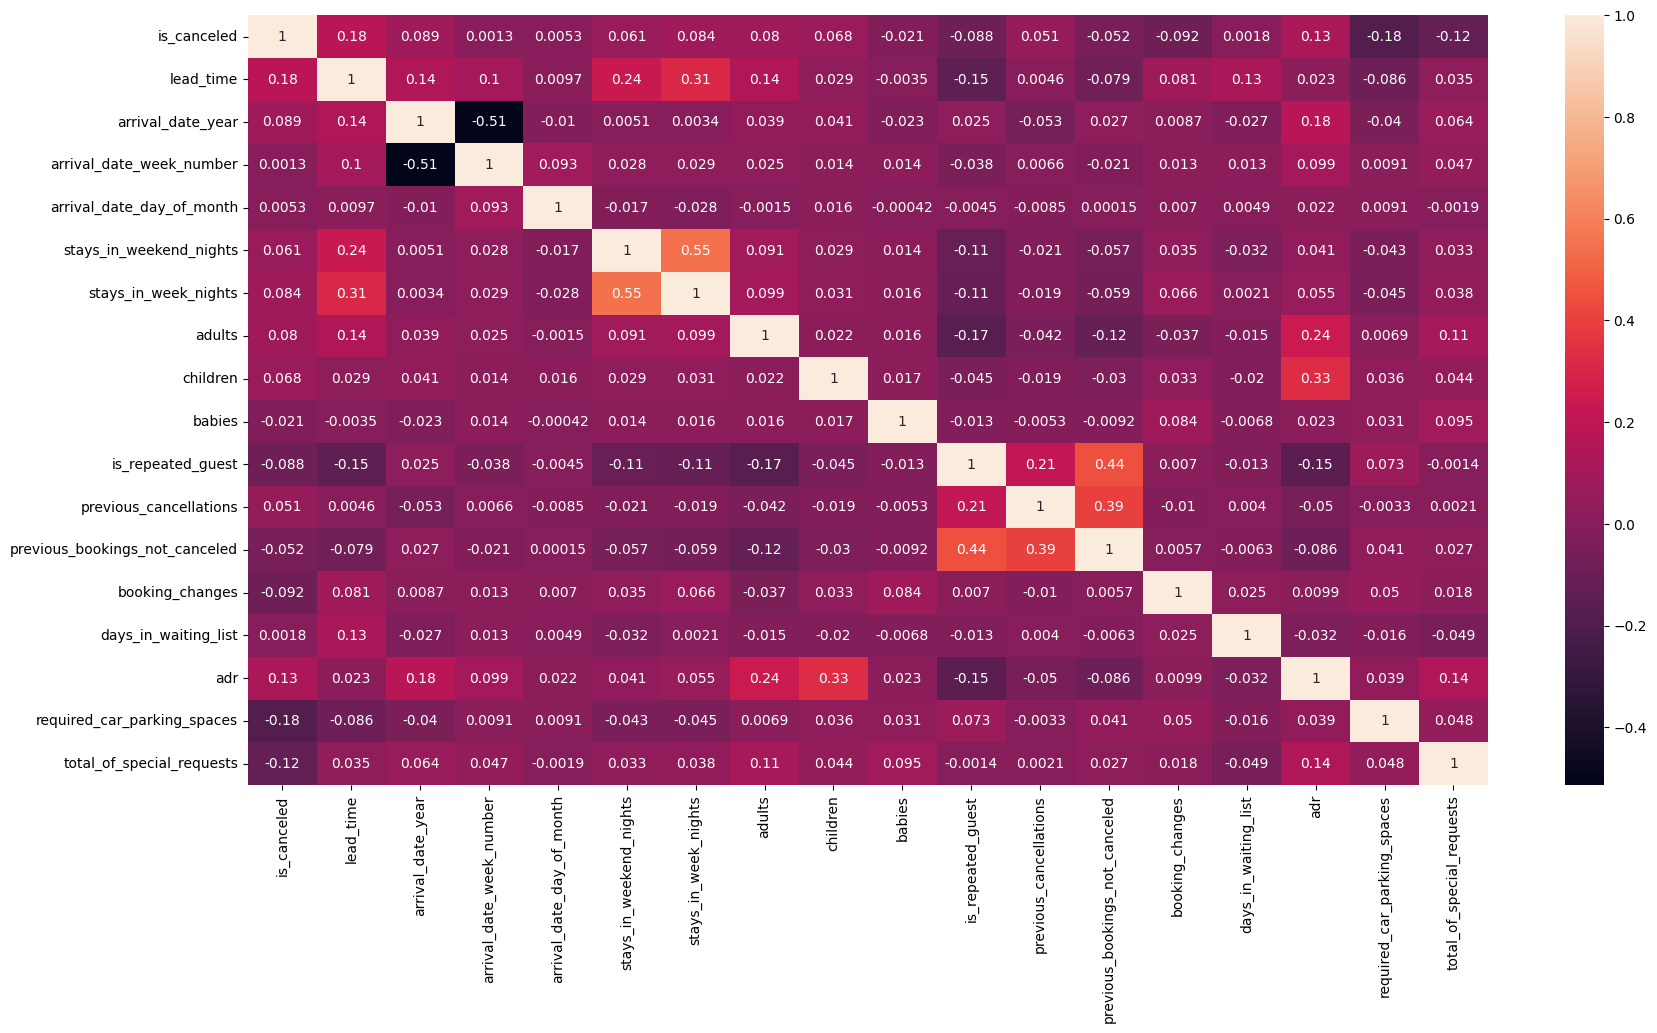

In [ ]:
d1=df.select_dtypes(include=['number'])
plt.figure(figsize=(20,10))
sns.heatmap(d1.corr(),annot=True)


In [ ]:
df.drop(['arrival_date_week_number','arrival_date_year'],axis=1,inplace=True)

### Handling Categorical data

converting categorical values to numerical values.label encode assigns a numerical value to each category.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['hotel']=lab.fit_transform(df['hotel'])
df['arrival_date_month']=lab.fit_transform(df['arrival_date_month'])
df['deposit_type']=lab.fit_transform(df['deposit_type'])
df['meal']=lab.fit_transform(df['meal'])
df['customer_type']=lab.fit_transform(df['customer_type'])
df['market_segment']=lab.fit_transform(df['market_segment'])
df['distribution_channel']=lab.fit_transform(df['distribution_channel'])
df['reserved_room_type']=lab.fit_transform(df['reserved_room_type'])
df['country']=lab.fit_transform(df['country'])
df['assigned_room_type']=lab.fit_transform(df['assigned_room_type'])
df['reservation_status']=lab.fit_transform(df['reservation_status'])

##Detecting and removing Outliers

Outliers are the data points that are away from the expected range of values.


<Axes: xlabel='lead_time'>

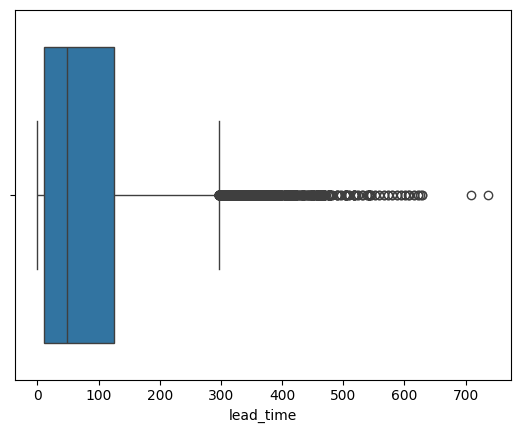

In [ ]:
sns.boxplot(x='lead_time',data=df)

<Axes: xlabel='adr'>

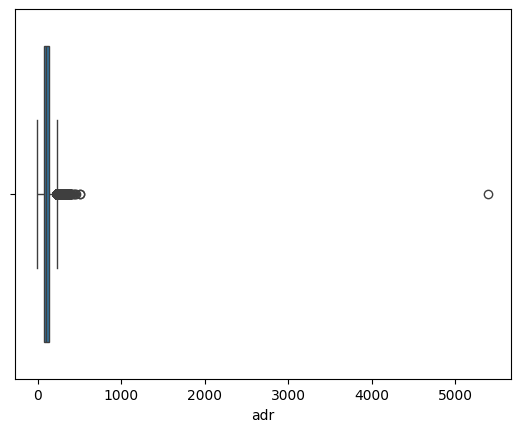

In [ ]:
sns.boxplot(x='adr',data=df)

<Axes: xlabel='stays_in_weekend_nights'>

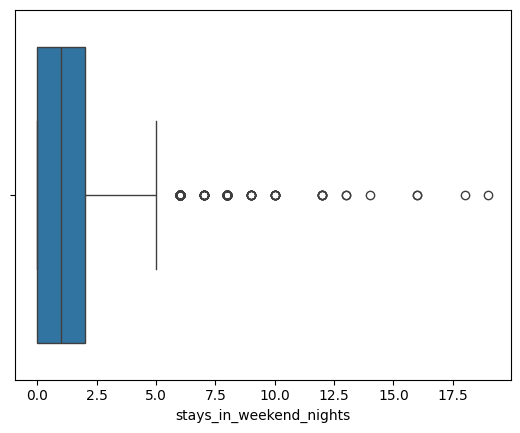

In [ ]:
sns.boxplot(x='stays_in_weekend_nights',data=df)

<Axes: xlabel='stays_in_week_nights'>

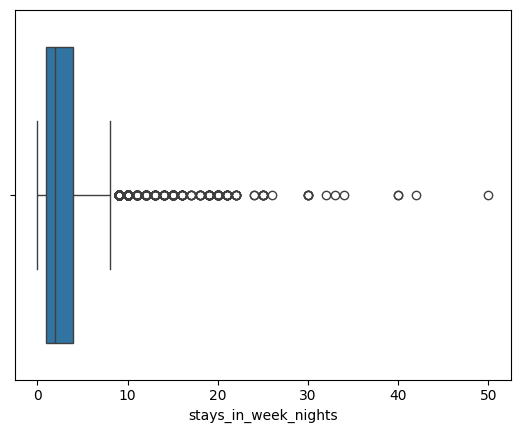

In [ ]:
sns.boxplot(x='stays_in_week_nights',data=df)

<Axes: xlabel='adults'>

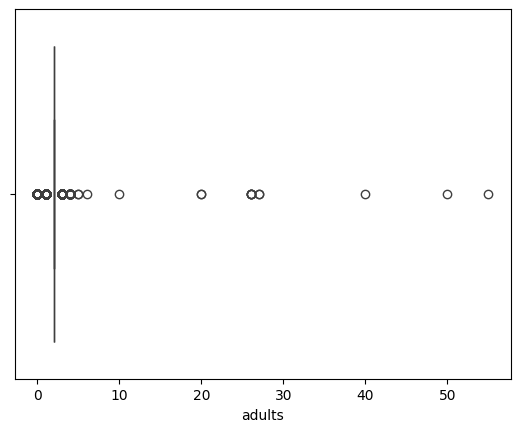

In [ ]:
sns.boxplot(x='adults',data=df)

<Axes: xlabel='babies'>

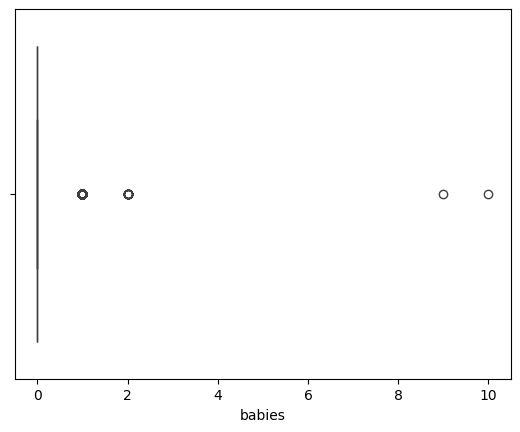

In [ ]:
sns.boxplot(x='babies',data=df)

<Axes: xlabel='children'>

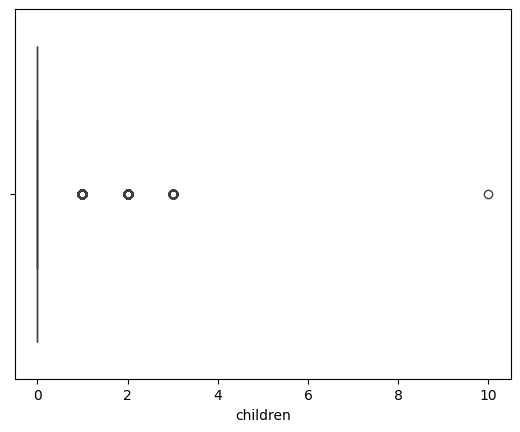

In [ ]:
sns.boxplot(x='children',data=df)

<Axes: xlabel='days_in_waiting_list'>

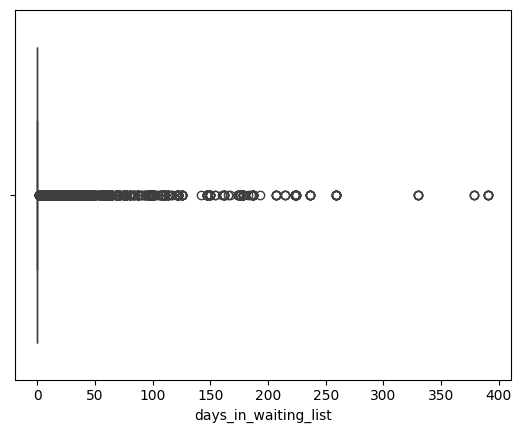

In [ ]:
sns.boxplot(x='days_in_waiting_list',data=df)

<Axes: xlabel='is_repeated_guest'>

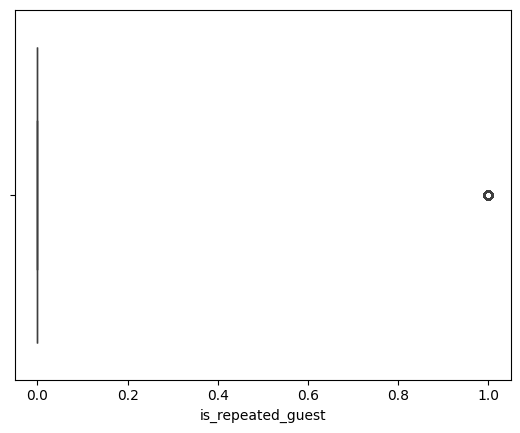

In [ ]:
sns.boxplot(x='is_repeated_guest',data=df)

<Axes: xlabel='previous_cancellations'>

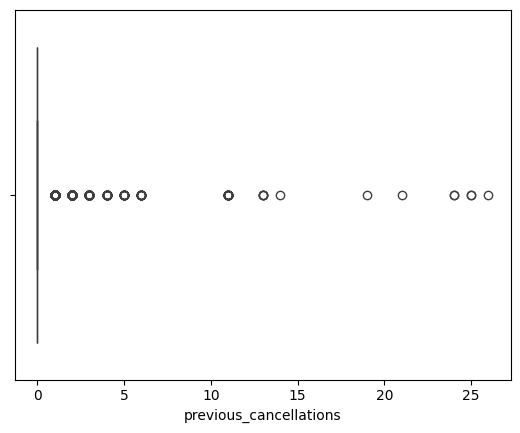

In [ ]:
sns.boxplot(x='previous_cancellations',data=df)

<Axes: xlabel='previous_bookings_not_canceled'>

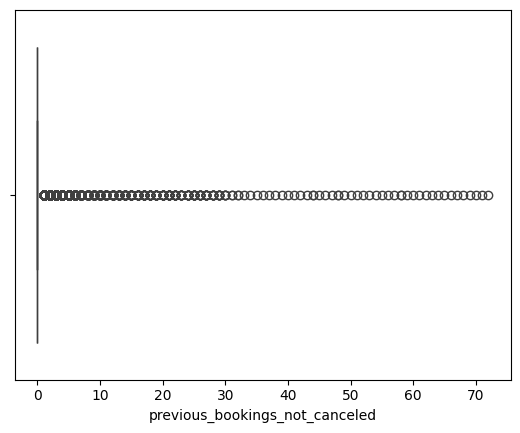

In [ ]:
sns.boxplot(x='previous_bookings_not_canceled',data=df)

<Axes: xlabel='booking_changes'>

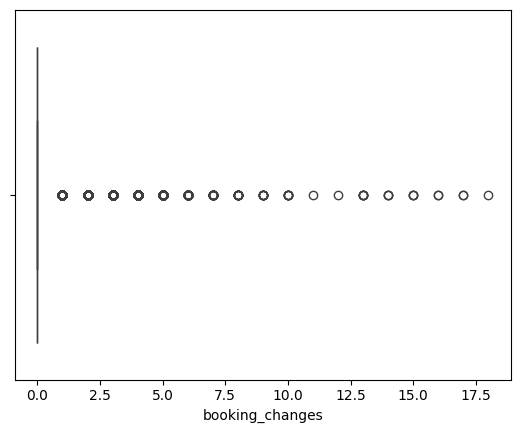

In [ ]:
sns.boxplot(x='booking_changes',data=df)

<Axes: xlabel='required_car_parking_spaces'>

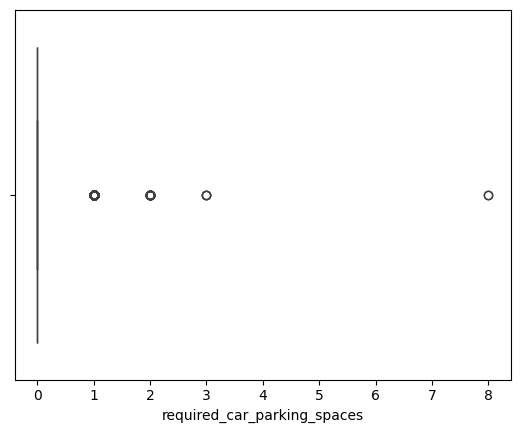

In [ ]:
sns.boxplot(x='required_car_parking_spaces',data=df)

<Axes: xlabel='total_of_special_requests'>

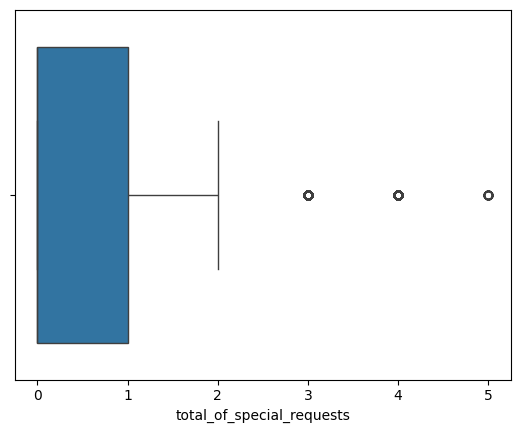

In [ ]:
sns.boxplot(x='total_of_special_requests',data=df)

In [ ]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
IQR =q1=q3
print(IQR)

hotel                               1.0
is_canceled                         1.0
lead_time                         125.0
arrival_date_month                  8.0
arrival_date_day_of_month          23.0
stays_in_weekend_nights             2.0
stays_in_week_nights                4.0
adults                              2.0
children                            0.0
babies                              0.0
meal                                0.0
country                           135.0
market_segment                      6.0
distribution_channel                3.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
reserved_room_type                  3.0
assigned_room_type                  3.0
booking_changes                     0.0
deposit_type                        0.0
days_in_waiting_list                0.0
customer_type                       2.0
adr                               134.1
required_car_parking_spaces         0.0


In [ ]:
df=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
df.reset_index(inplace=True)
df.shape

(40332, 28)

###**Feature selection**

The process of reducing features to improve accuracy.Using chi square method to calculate chi square between each features and target to select desired number of feature with best chi square scores.

In [ ]:
from sklearn.feature_selection import chi2
x=df.drop(['is_canceled'],axis=1)
y=df['is_canceled']
chi=chi2(x,y)


In [ ]:
chi

(array([6.32035348e+07, 3.99746483e+00, 7.96408970e+04, 2.23894095e+02,
        3.79504769e+01, 7.36420509e+01, 3.41497530e+02, 3.31478375e+01,
                   nan,            nan,            nan, 1.25652235e+04,
        3.29046746e+02, 1.24606817e+02,            nan,            nan,
                   nan, 6.15433684e+02, 3.24938529e+01,            nan,
                   nan,            nan, 1.40643729e-01, 2.06730338e+04,
                   nan, 3.47521350e+02, 9.34949586e+03]),
 array([0.00000000e+000, 4.55687562e-002, 0.00000000e+000, 1.27942632e-050,
        7.25633328e-010, 9.36482217e-018, 3.01118385e-076, 8.54113137e-009,
                    nan,             nan,             nan, 0.00000000e+000,
        1.55027316e-073, 6.20475338e-029,             nan,             nan,
                    nan, 7.36071644e-136, 1.19570137e-008,             nan,
                    nan,             nan, 7.07641895e-001, 0.00000000e+000,
                    nan, 1.46860870e-077, 0.00000000e+

In [ ]:
#high chi value most importance
chi_values=pd.Series(chi[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values


index                             6.320353e+07
lead_time                         7.964090e+04
adr                               2.067303e+04
country                           1.256522e+04
reservation_status                9.349496e+03
reserved_room_type                6.154337e+02
total_of_special_requests         3.475214e+02
stays_in_week_nights              3.414975e+02
market_segment                    3.290467e+02
arrival_date_month                2.238941e+02
distribution_channel              1.246068e+02
stays_in_weekend_nights           7.364205e+01
arrival_date_day_of_month         3.795048e+01
adults                            3.314784e+01
assigned_room_type                3.249385e+01
hotel                             3.997465e+00
customer_type                     1.406437e-01
children                                   NaN
babies                                     NaN
meal                                       NaN
is_repeated_guest                          NaN
previous_canc

In [ ]:
#high p value lower the importance
p_values=pd.Series(chi[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values

customer_type                      7.076419e-01
hotel                              4.556876e-02
assigned_room_type                 1.195701e-08
adults                             8.541131e-09
arrival_date_day_of_month          7.256333e-10
stays_in_weekend_nights            9.364822e-18
distribution_channel               6.204753e-29
arrival_date_month                 1.279426e-50
market_segment                     1.550273e-73
stays_in_week_nights               3.011184e-76
total_of_special_requests          1.468609e-77
reserved_room_type                7.360716e-136
index                              0.000000e+00
adr                                0.000000e+00
country                            0.000000e+00
lead_time                          0.000000e+00
reservation_status                 0.000000e+00
children                                    NaN
babies                                      NaN
meal                                        NaN
is_repeated_guest                       

In [ ]:
x=[ 'hotel', 'lead_time', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status']
y = ['is_canceled']

In [ ]:
x1=df[x]
x1

,hotel,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,7,5,1,0,1,1,0,0,0,...,0,2,0,0,0,2,75.00,0,0,1
1,1,13,5,1,0,1,1,0,0,0,...,0,0,0,0,0,2,75.00,0,0,1
2,1,14,5,1,0,2,2,0,0,0,...,0,0,0,0,0,2,98.00,0,1,1
3,1,0,5,1,0,2,2,0,0,0,...,2,2,0,0,0,2,107.00,0,0,1
4,1,85,5,1,0,3,2,0,0,0,...,0,0,0,0,0,2,82.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40327,0,164,1,31,2,4,2,0,0,0,...,0,0,0,0,0,2,87.60,0,0,1
40328,0,21,1,30,2,5,2,0,0,0,...,0,0,0,0,0,2,96.14,0,2,1
40329,0,23,1,30,2,5,2,0,0,0,...,0,0,0,0,0,2,96.14,0,0,1
40330,0,102,1,31,2,5,3,0,0,0,...,4,4,0,0,0,2,225.43,0,2,1


In [ ]:
y1=df[y]
y1

,is_canceled
0,0
1,0
2,0
3,0
4,1
...,...
40327,0
40328,0
40329,0
40330,0


##Balancing the dataset

balancing the data set using  SMOTE(synthetic minority oversampling technique) method.

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x1,y1)
y_resampled.value_counts()

is_canceled
0              28612
1              28612
Name: count, dtype: int64

In [ ]:
x2=x_resampled.values
x2

array([[ 1.,  7.,  5., ...,  0.,  0.,  1.],
       [ 1., 13.,  5., ...,  0.,  0.,  1.],
       [ 1., 14.,  5., ...,  0.,  1.,  1.],
       ...,
       [ 0., 25.,  4., ...,  0.,  0.,  0.],
       [ 1., 68., 11., ...,  0.,  0.,  0.],
       [ 0., 70.,  5., ...,  0.,  0.,  0.]])

In [ ]:
y2=y_resampled.values
y2

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

##**Train Test split**

Data set split into train for train the ML model and test for evaluate the perfomance of the model.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.30,random_state=42)
x_train

array([[ 0., 70.,  8., ...,  0.,  0.,  1.],
       [ 0., 98.,  9., ...,  0.,  0.,  0.],
       [ 0., 50., 10., ...,  0.,  0.,  0.],
       ...,
       [ 1., 97., 11., ...,  0.,  1.,  0.],
       [ 0., 25., 10., ...,  0.,  1.,  1.],
       [ 0., 35.,  8., ...,  0.,  1.,  1.]])

In [ ]:
x_test

array([[  0., 146.,   4., ...,   0.,   0.,   0.],
       [  0.,   4.,   1., ...,   0.,   1.,   1.],
       [  0.,  77.,   3., ...,   0.,   0.,   0.],
       ...,
       [  0., 111.,   0., ...,   0.,   0.,   1.],
       [  0., 168.,  11., ...,   0.,   0.,   0.],
       [  1., 240.,  11., ...,   0.,   1.,   1.]])

In [ ]:
y_train

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
y_test

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

##**standardisation**


 method used to normalize a range of features of data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train


array([[-0.68528926, -0.08936947,  0.82130049, ...,  0.        ,
        -0.76206081,  0.89811911],
       [-0.68528926,  0.29662669,  1.11867021, ...,  0.        ,
        -0.76206081, -1.01922136],
       [-0.68528926, -0.36508101,  1.41603993, ...,  0.        ,
        -0.76206081, -1.01922136],
       ...,
       [ 1.45923781,  0.28284111,  1.71340966, ...,  0.        ,
         0.7250827 , -1.01922136],
       [-0.68528926, -0.70972044,  1.41603993, ...,  0.        ,
         0.7250827 ,  0.89811911],
       [-0.68528926, -0.57186467,  0.82130049, ...,  0.        ,
         0.7250827 ,  0.89811911]])

In [ ]:
x_test

array([[-6.92359981e-01,  9.52045130e-01, -3.81137665e-01, ...,
         0.00000000e+00, -7.47704131e-01, -1.03096778e+00],
       [-6.92359981e-01, -1.00273119e+00, -1.27414623e+00, ...,
         0.00000000e+00,  7.48401291e-01,  8.94163264e-01],
       [-6.92359981e-01,  2.18902977e-03, -6.78807187e-01, ...,
         0.00000000e+00, -7.47704131e-01, -1.03096778e+00],
       ...,
       [-6.92359981e-01,  4.70234065e-01, -1.57181575e+00, ...,
         0.00000000e+00, -7.47704131e-01,  8.94163264e-01],
       [-6.92359981e-01,  1.25489780e+00,  1.70254899e+00, ...,
         0.00000000e+00, -7.47704131e-01, -1.03096778e+00],
       [ 1.44433536e+00,  2.24605199e+00,  1.70254899e+00, ...,
         0.00000000e+00,  7.48401291e-01,  8.94163264e-01]])

##**Model creation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# **Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score of Logistic Regression is : 0.9792054986020503
Confusion Matrix : 
[[8656    0]
 [ 357 8155]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8656
           1       1.00      0.96      0.98      8512

    accuracy                           0.98     17168
   macro avg       0.98      0.98      0.98     17168
weighted avg       0.98      0.98      0.98     17168



# **KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score of KNN is : 0.9849720410065238
Confusion Matrix : 
[[8625   31]
 [ 227 8285]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      8656
           1       1.00      0.97      0.98      8512

    accuracy                           0.98     17168
   macro avg       0.99      0.98      0.98     17168
weighted avg       0.99      0.98      0.98     17168



#**Naive Bayes**

In [ ]:
bn = BernoulliNB()
bn.fit(x_train, y_train)

y_pred_bn = bn.predict(x_test)

acc_bn = accuracy_score(y_test, y_pred_bn)
conf = confusion_matrix(y_test, y_pred_bn)
clf_report = classification_report(y_test, y_pred_bn)

print(f"Accuracy Score of Decision Tree is : {acc_bn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score of Decision Tree is : 0.9792054986020503
Confusion Matrix : 
[[8656    0]
 [ 357 8155]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8656
           1       1.00      0.96      0.98      8512

    accuracy                           0.98     17168
   macro avg       0.98      0.98      0.98     17168
weighted avg       0.98      0.98      0.98     17168



#**SVM**

In [ ]:
svc =SVC()
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
conf = confusion_matrix(y_test, y_pred_svc)
clf_report = classification_report(y_test, y_pred_svc)

print(f"Accuracy Score of Decision Tree is : {acc_svc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score of Decision Tree is : 0.9894571295433364
Confusion Matrix : 
[[8656    0]
 [ 181 8331]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8656
           1       1.00      0.98      0.99      8512

    accuracy                           0.99     17168
   macro avg       0.99      0.99      0.99     17168
weighted avg       0.99      0.99      0.99     17168



#**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9407618825722274
Confusion Matrix : 
[[7744  912]
 [ 105 8407]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      8656
           1       0.90      0.99      0.94      8512

    accuracy                           0.94     17168
   macro avg       0.94      0.94      0.94     17168
weighted avg       0.94      0.94      0.94     17168



#**Random Forest**

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(x_train, y_train)

y_pred_rd_clf = rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<ipython-input-114-4f868435233a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rd_clf.fit(x_train, y_train)


Accuracy Score of Random Forest is : 0.9924860205032618
Confusion Matrix : 
[[8652    4]
 [ 125 8387]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8656
           1       1.00      0.99      0.99      8512

    accuracy                           0.99     17168
   macro avg       0.99      0.99      0.99     17168
weighted avg       0.99      0.99      0.99     17168



#**Model comparison**

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'K Neighbhor classifier', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lr, acc_knn, acc_bn, acc_svc, acc_dtc, acc_rd_clf]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Random Forest Classifier,0.992486
3,Support Vector Machine,0.989457
1,K Neighbhor classifier,0.984972
0,Logistic Regression,0.979205
2,Naive Bayes,0.979205
4,Decision Tree Classifier,0.940762


In [ ]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')


#conclusion
To make prediction the best model that can be used is RandomForest with accuracy score:0.99